# Trabajo Práctico Clasificación
## Integrantes: 
  * Boldrini Matias
  * Tomás Bourguet (el chico eficiente)
  * Ignacio Chaves

# Análisis Exploratorio de los Datos

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics as m
import statsmodels.api as sm

In [168]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [170]:
from scipy.stats import shapiro

# Listas para almacenar los nombres de las columnas
normal_distribution = []

# Iteramos sobre todas las columnas excepto 'target'
for column in df.columns:
    if column != 'target':
        stat, p = shapiro(df[column])
        
        # Interpretación
        alpha = 0.05
        if p > alpha:
            normal_distribution.append(column)

print(f"Columnas con distribución normal: {len(normal_distribution)}")

Columnas con distribución normal: 0


# Partición y Normalización de datos

In [171]:
X = df.drop('target', axis=1)
y = df['target']

#Definición del % de datos que vamos a reservar para testeo
test_size = 0.20

#Definición de una semilla para garantizar la reproducibilidad de los resultados
random_state = 27

In [172]:
from sklearn.preprocessing import MinMaxScaler

# Escalar los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convertir el resultado en un DataFrame para una mejor visualización
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Mostrar las primeras filas del DataFrame escalado
X_scaled_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [173]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba de manera estratificada
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=test_size, stratify=y, random_state=random_state)

In [174]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
import numpy as np

# Definir mapas de colores para las clases y las particiones
cmap_clases = ListedColormap(['#f4a59c', '#e94a4a'])  # Colores para clases
cmap_train_test = ListedColormap(['#85ee7e', '#7e9dee'])  # Colores para entrenamiento y testeo

def visualize_split(classes, groups, splits):
    fig, ax = plt.subplots(figsize=(10, 6))
    espaciado = list(range(splits, 0, -1))

    # Graficar las clases
    ax.scatter(range(len(classes)), [splits + 1.0] * len(classes), c=classes, marker='_', lw=25, cmap=cmap_clases)
    legend1 = plt.legend([Patch(color=cmap_clases(0.0)), Patch(color=cmap_clases(1.0))], ['Clase 0', 'Clase 1'], loc='upper right')

    if splits == 1:
        ax.scatter(range(len(groups)), [splits] * len(groups), c=groups, marker='_', lw=25, cmap=cmap_train_test)
        ax.set(yticks=[splits, splits + 1.0], yticklabels=['Entrenamiento/Testeo', 'Clases'], xlabel="Observaciones")
        ax.legend([Patch(color=cmap_train_test(0.0)), Patch(color=cmap_train_test(1.0))], ['Entrenamiento', 'Testeo'], loc='lower right')
        plt.gca().add_artist(legend1)

    elif splits == len(classes):
        for i in range(len(espaciado)):
            ax.scatter(range(len(groups[i])), [espaciado[i]] * len(groups[i]), c=groups[i], marker='_', lw=25, cmap=cmap_train_test)
        ax.legend([Patch(color=cmap_train_test(0.0)), Patch(color=cmap_train_test(1.0))], ['Entrenamiento', 'Testeo'], loc='lower right')
        plt.gca().add_artist(legend1)
        if splits < 11:
          ticklabels = [f'CV {x}' for x in reversed(espaciado)]
          ticklabels.append('Clases')
          espaciado.append(splits + 1)
          ax.set(yticks=espaciado, yticklabels=ticklabels, xlabel="Observaciones")

    else:
        for i in range(len(espaciado)):
            ax.scatter(range(len(groups[i])), [espaciado[i]] * len(groups[i]), c=groups[i], marker='_', lw=25, cmap=cmap_train_test)
        ax.legend([Patch(color=cmap_train_test(0.0)), Patch(color=cmap_train_test(1.0))], ['Entrenamiento', 'Testeo'], loc='lower right')
        plt.gca().add_artist(legend1)
        if splits < 11:
          ticklabels = [f'CV {x}' for x in reversed(espaciado)]
          ticklabels.append('Clases')
          espaciado.append(splits + 1)
          ax.set(ylim=[0, splits + 2], yticks=espaciado, yticklabels=ticklabels, xlabel="Observaciones")



    plt.title('Visualización de la Partición de Conjuntos')
    plt.show()

In [175]:
#Cantidad de grupos y particiones que se van a realizar
nro_splits = 5

#Datos de clase
clases = y

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

#Datos de cantidad de particiones
skf = StratifiedKFold(n_splits=nro_splits)

grupos = []

X_train_list = []
X_test_list = []
Y_train_list = []
Y_test_list = []

#Datos de la partición
nro = 1
for train_index, test_index in skf.split(X,y):
    X_train_list.append(X_scaled_df.iloc[train_index])
    X_test_list.append(X_scaled_df.iloc[test_index])
    Y_train_list.append(y.iloc[train_index])
    Y_test_list.append(y.iloc[test_index])
    grupo = np.zeros(y.shape)
    for counter in range(len(grupo)):
      if (counter in train_index):
        grupo[counter]=0
      else:
        grupo[counter]=1

    grupos.append(grupo)

    train_C0=0
    train_C1=0
    test_C0=0
    test_C1=0


    for j in range(len(grupo)): #recorro la información de grupo de entrenamiento/test
        if (grupo[j]==0 and clases[j]==0):
          train_C0 = train_C0 + 1
        if (grupo[j]==0 and clases[j]==1):
          train_C1 = train_C1 + 1
        if (grupo[j]==1 and clases[j]==0):
          test_C0 = test_C0 + 1
        if (grupo[j]==1 and clases[j]==1):
          test_C1 = test_C1 + 1

    print('CV %d: Entrenamiento %.2f C1/C0 | Test %.2f C1/C0' %(nro, train_C1/train_C0, test_C1/test_C0))
    nro = nro +1

CV 1: Entrenamiento 1.69 C1/C0 | Test 1.65 C1/C0
CV 2: Entrenamiento 1.69 C1/C0 | Test 1.65 C1/C0
CV 3: Entrenamiento 1.68 C1/C0 | Test 1.71 C1/C0
CV 4: Entrenamiento 1.68 C1/C0 | Test 1.71 C1/C0
CV 5: Entrenamiento 1.68 C1/C0 | Test 1.69 C1/C0


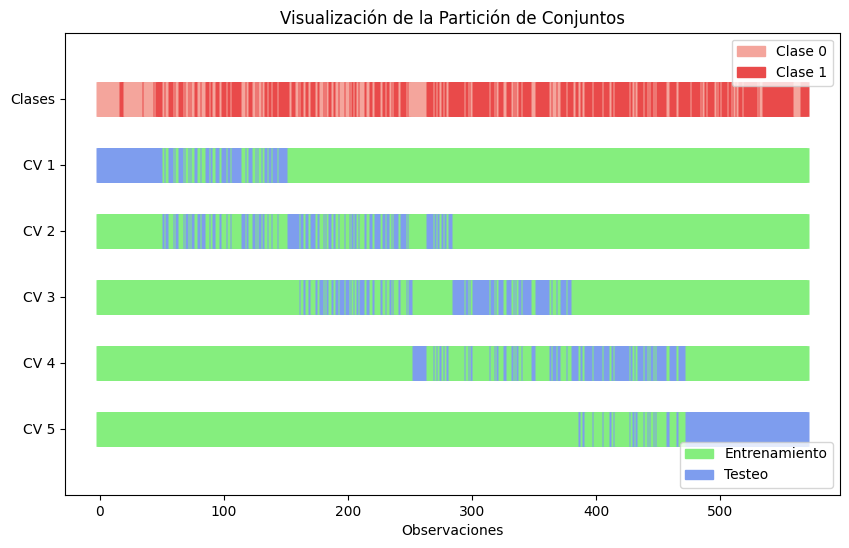

In [176]:
visualize_split(clases, grupos, nro_splits)

# Selección de características

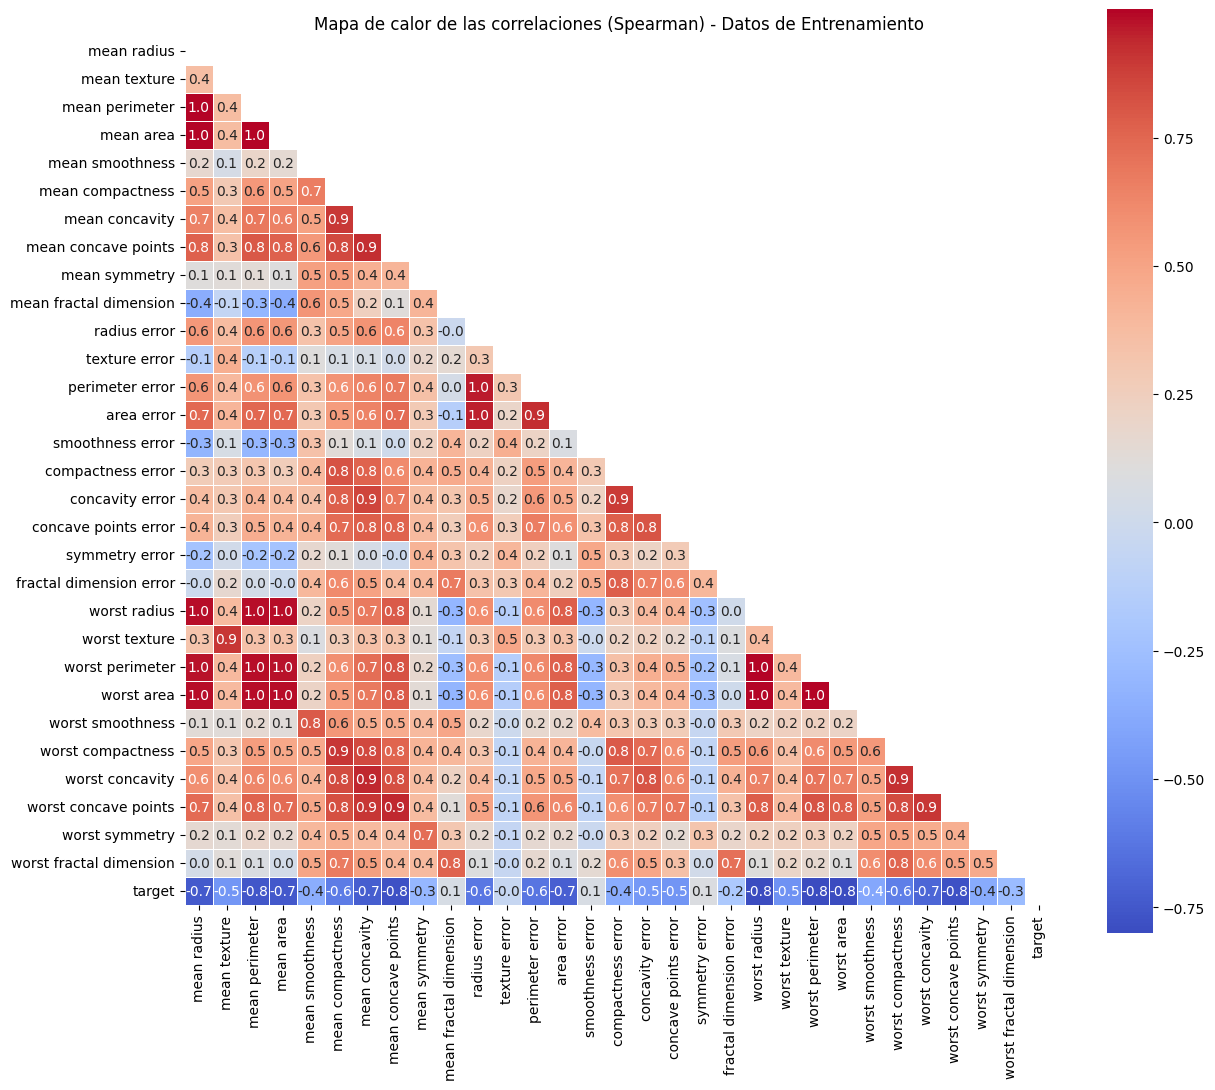

In [177]:
XY_train = pd.concat([X_train, y_train], axis=1)
XY_test = pd.concat([X_test, y_test], axis=1)

# Calcular la correlación de Spearman
correlation_matrix = XY_train.corr(method='spearman')

# Crear un mapa de calor
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5, mask=mask, square=True)
plt.title("Mapa de calor de las correlaciones (Spearman) - Datos de Entrenamiento")
plt.show()

In [178]:
# Filtrar características con correlación menor o igual a 0.55
correlation_threshold = 0.55

# Obtener las características con correlación menor o igual al umbral
high_corr_features = correlation_matrix.index[correlation_matrix['target'].abs() >= correlation_threshold].tolist()

high_corr_features.remove('target')

# Filtrar las características en las particiones de los datasets
X_train_list = [X_train[high_corr_features] for X_train in X_train_list]
X_test_list = [X_test[high_corr_features] for X_test in X_test_list]

# Filtrar las características en los datasets de entrenamiento y prueba
X_train = X_train[high_corr_features]
X_test = X_test[high_corr_features]

# Filtrar las características en el dataframe original
XY_train = XY_train[high_corr_features + ['target']]
XY_train.head()

,mean radius,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,worst radius,worst perimeter,worst area,worst compactness,worst concavity,worst concave points,target
467,0.127171,0.119342,0.060573,0.107049,0.034653,0.028673,0.083324,0.071526,0.026481,0.114550,0.103093,0.047926,0.095284,0.051190,0.085911,1
51,0.315159,0.300048,0.181676,0.126403,0.043510,0.085636,0.027413,0.032606,0.014471,0.239772,0.227452,0.115882,0.127010,0.083866,0.295052,1
530,0.225709,0.221823,0.118515,0.238482,0.123758,0.220676,0.118378,0.112708,0.044561,0.198150,0.189800,0.090223,0.153399,0.109105,0.347079,1
7,0.318472,0.320710,0.184263,0.445126,0.219447,0.297465,0.170922,0.146021,0.082477,0.324795,0.299766,0.174941,0.330753,0.213898,0.534708,0
150,0.284869,0.274480,0.159449,0.173333,0.073477,0.131461,0.111787,0.099703,0.052256,0.221629,0.201255,0.106051,0.080731,0.064792,0.216357,1


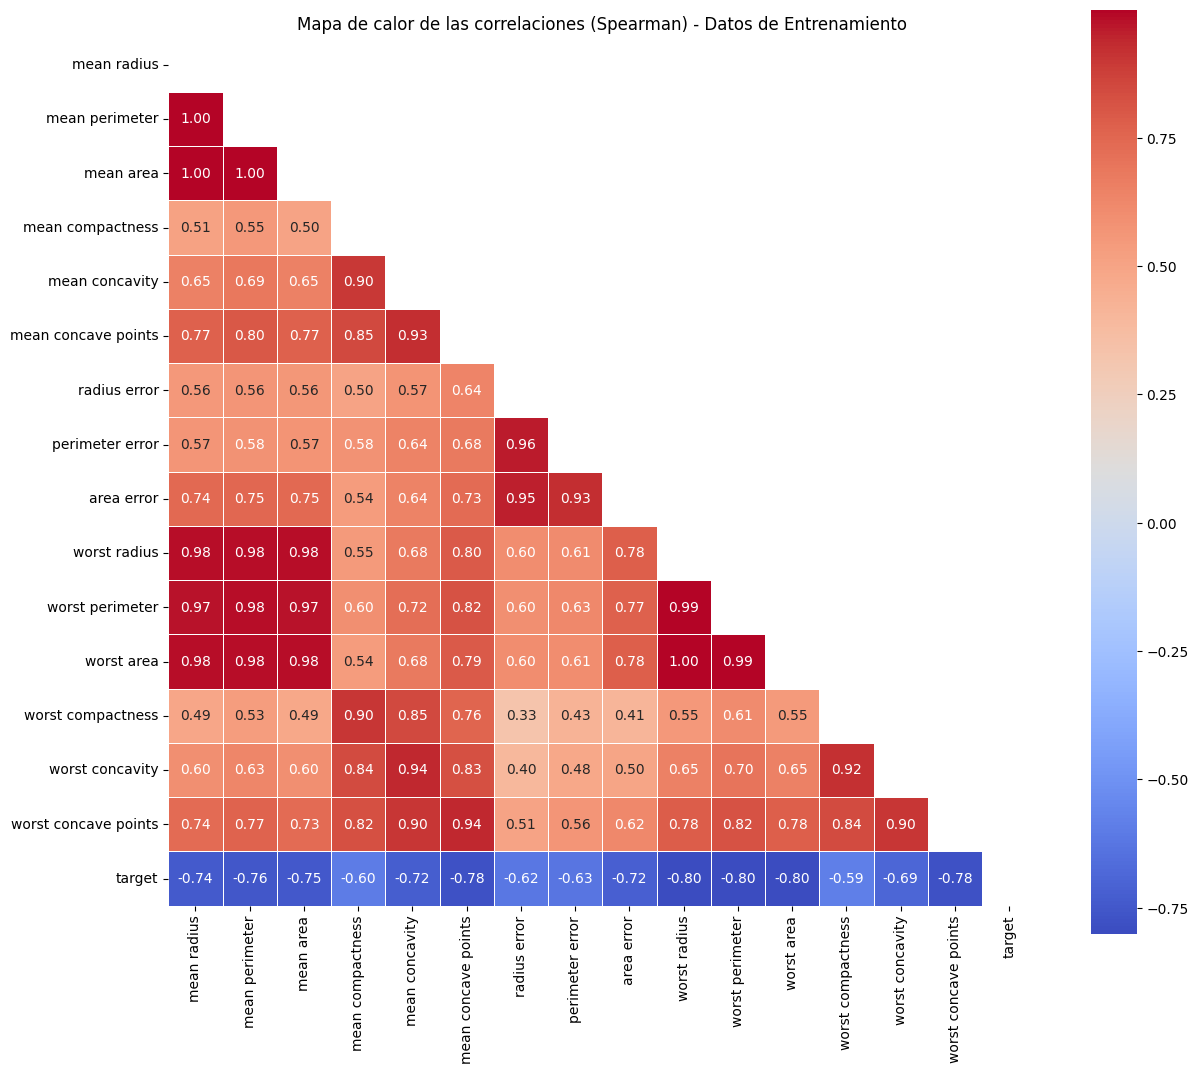

In [179]:
# Crear un nuevo mapa de calor de la correlación utilizando XY_train
filtered_correlation_matrix = XY_train.corr(method='spearman')

plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(filtered_correlation_matrix, dtype=bool))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, mask=mask, square=True)
plt.title("Mapa de calor de las correlaciones (Spearman) - Datos de Entrenamiento")
plt.show()


> ## **Nota:** Eliminamos las variables derivadas area y perimetro que dependen del radio.

In [180]:
# Eliminar las columnas que contienen 'perimeter' y 'area' de cada dataset
columns_to_drop = [col for col in df.columns if 'perimeter' in col or 'area' in col]

# Eliminar las columnas en los datasets de entrenamiento.
X_train_list = [X_train.drop(columns=columns_to_drop) for X_train in X_train_list]
X_test_list = [X_test.drop(columns=columns_to_drop) for X_test in X_test_list]

# Filtrar las características en los datasets de entrenamiento y prueba
X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

# Eliminar las columnas en XY_train
XY_train = XY_train.drop(columns=columns_to_drop)

# Mostrar las primeras filas del primer dataset de entrenamiento para verificar
XY_train.head()

,mean radius,mean compactness,mean concavity,mean concave points,radius error,worst radius,worst compactness,worst concavity,worst concave points,target
467,0.127171,0.107049,0.034653,0.028673,0.083324,0.114550,0.095284,0.051190,0.085911,1
51,0.315159,0.126403,0.043510,0.085636,0.027413,0.239772,0.127010,0.083866,0.295052,1
530,0.225709,0.238482,0.123758,0.220676,0.118378,0.198150,0.153399,0.109105,0.347079,1
7,0.318472,0.445126,0.219447,0.297465,0.170922,0.324795,0.330753,0.213898,0.534708,0
150,0.284869,0.173333,0.073477,0.131461,0.111787,0.221629,0.080731,0.064792,0.216357,1


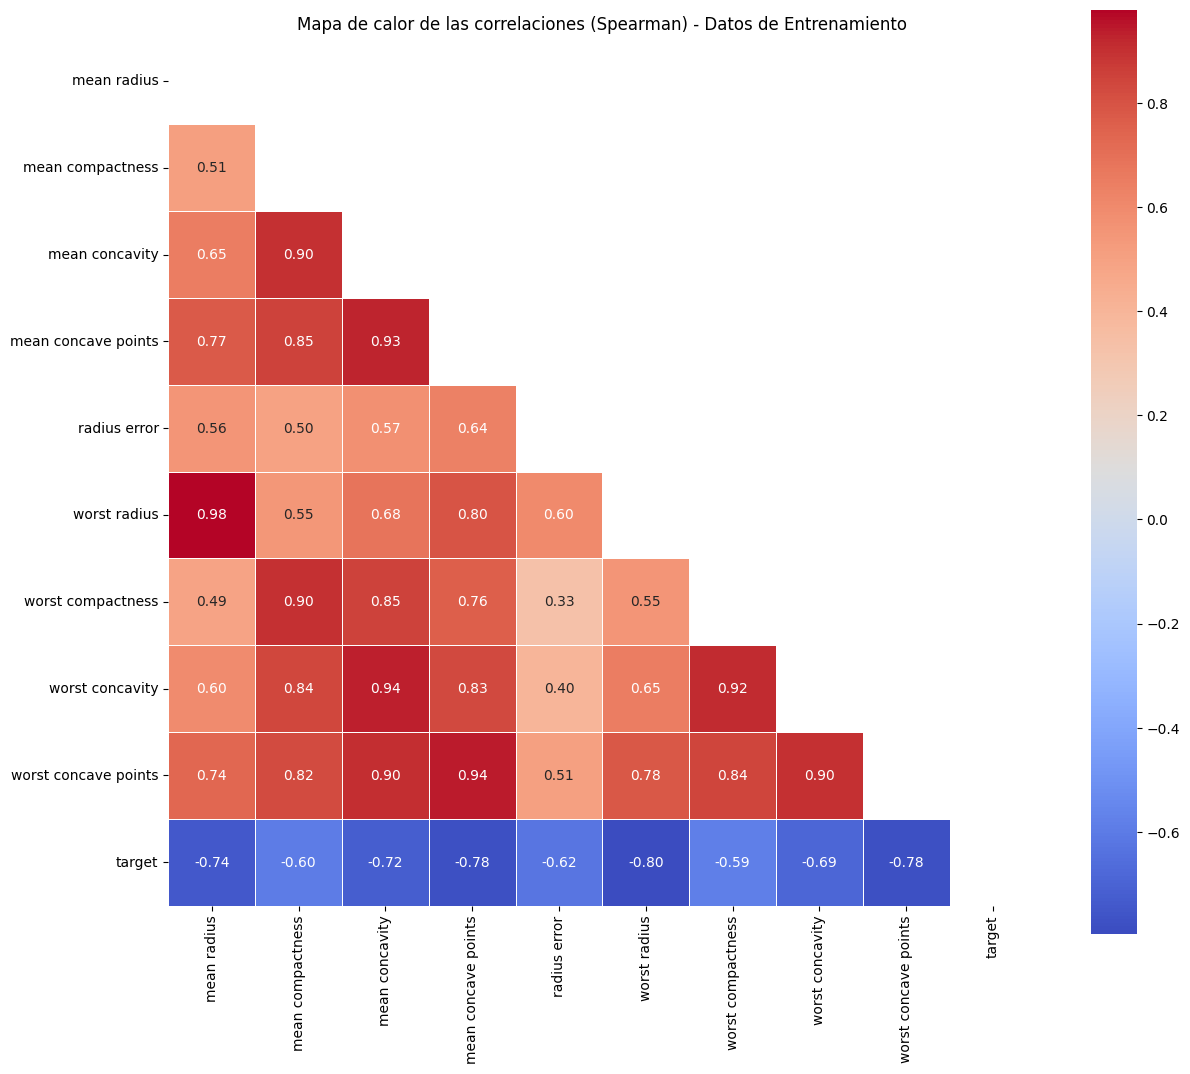

In [181]:
# Crear un nuevo mapa de calor de la correlación utilizando XY_train
filtered_correlation_matrix = XY_train.corr(method='spearman')

plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(filtered_correlation_matrix, dtype=bool))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, mask=mask, square=True)
plt.title("Mapa de calor de las correlaciones (Spearman) - Datos de Entrenamiento")
plt.show()

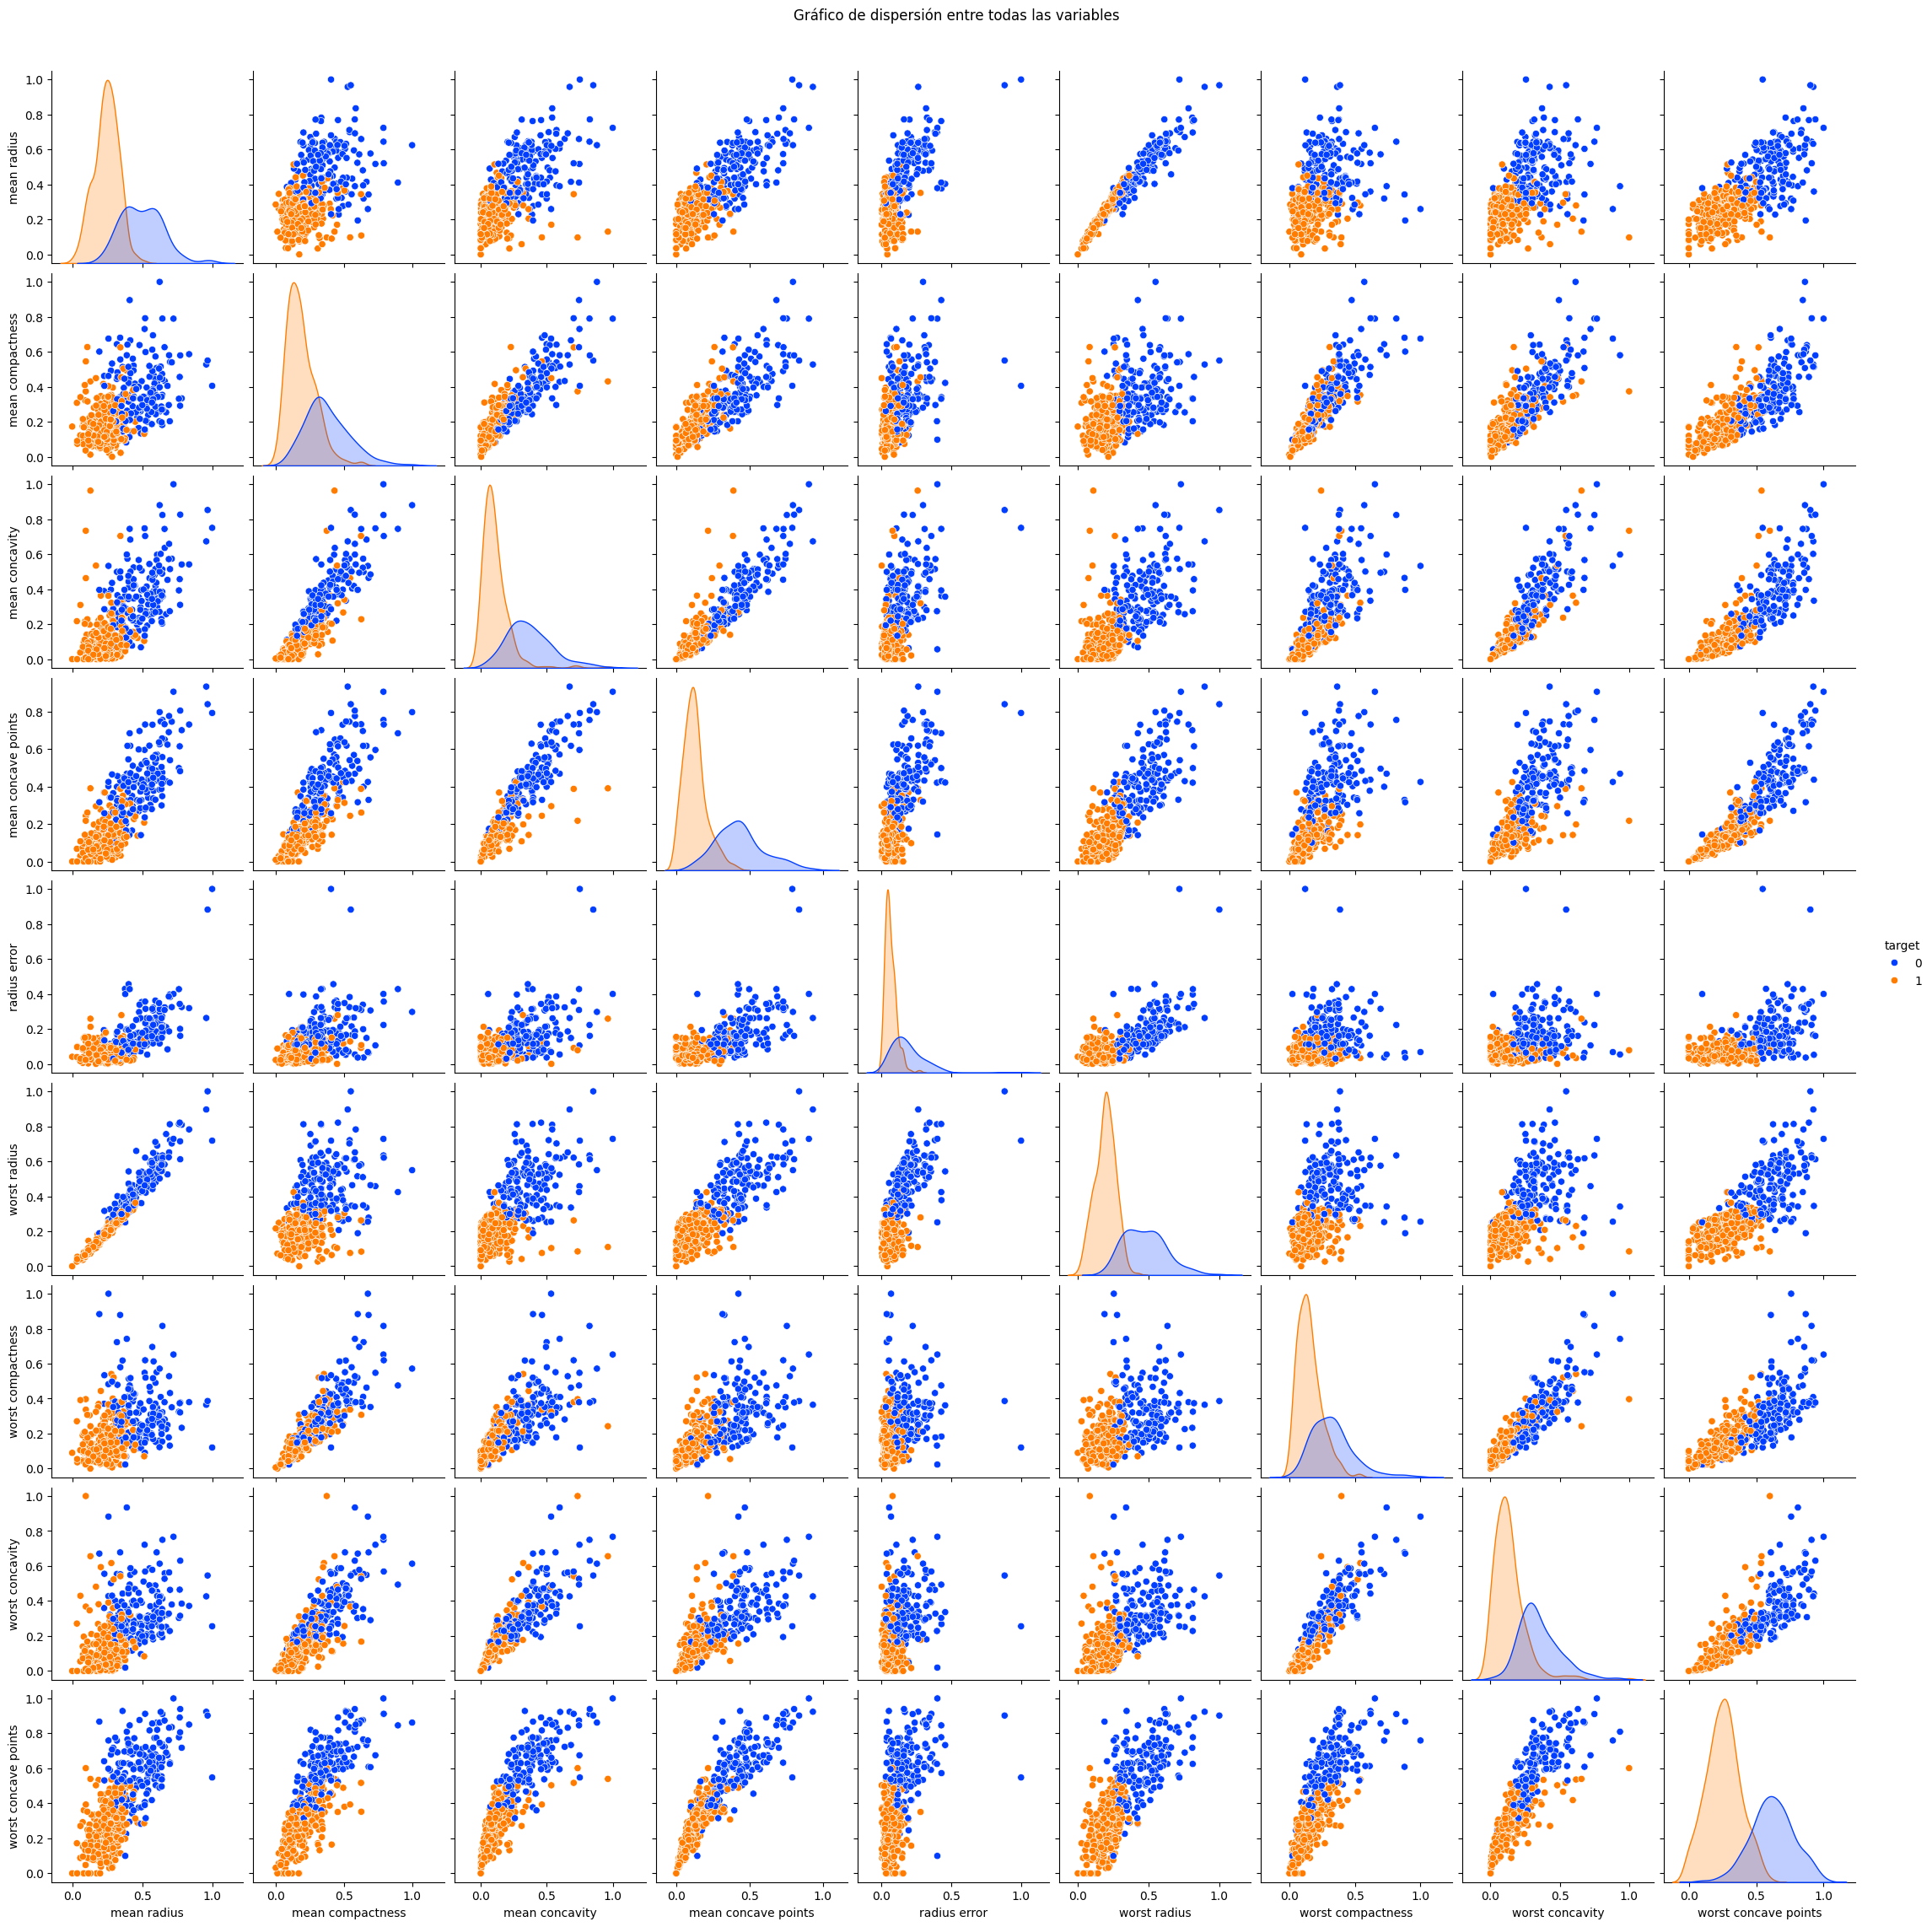

In [182]:
# Crear un gráfico de dispersión entre todas las variables, etiquetando los puntos en base a 'target'
sns.pairplot(XY_train, hue='target', diag_kind='kde', palette='bright')
plt.suptitle("Gráfico de dispersión entre todas las variables", y=1.02)
plt.show()

In [183]:
# Eliminar las columnas que contienen 'worst concavity' y 'compactness' de cada dataset
columns_to_drop = [col for col in df.columns if 'worst concavity' in col or 'worst compactness' in col]

# Eliminar las columnas en los datasets de entrenamiento.
X_train_list = [X_train.drop(columns=columns_to_drop) for X_train in X_train_list]
X_test_list = [X_test.drop(columns=columns_to_drop) for X_test in X_test_list]

# Filtrar las características en los datasets de entrenamiento y prueba
X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

# Eliminar las columnas en XY_train
XY_train = XY_train.drop(columns=columns_to_drop)

# Mostrar las primeras filas del primer dataset de entrenamiento para verificar
XY_train.head()

,mean radius,mean compactness,mean concavity,mean concave points,radius error,worst radius,worst concave points,target
467,0.127171,0.107049,0.034653,0.028673,0.083324,0.114550,0.085911,1
51,0.315159,0.126403,0.043510,0.085636,0.027413,0.239772,0.295052,1
530,0.225709,0.238482,0.123758,0.220676,0.118378,0.198150,0.347079,1
7,0.318472,0.445126,0.219447,0.297465,0.170922,0.324795,0.534708,0
150,0.284869,0.173333,0.073477,0.131461,0.111787,0.221629,0.216357,1


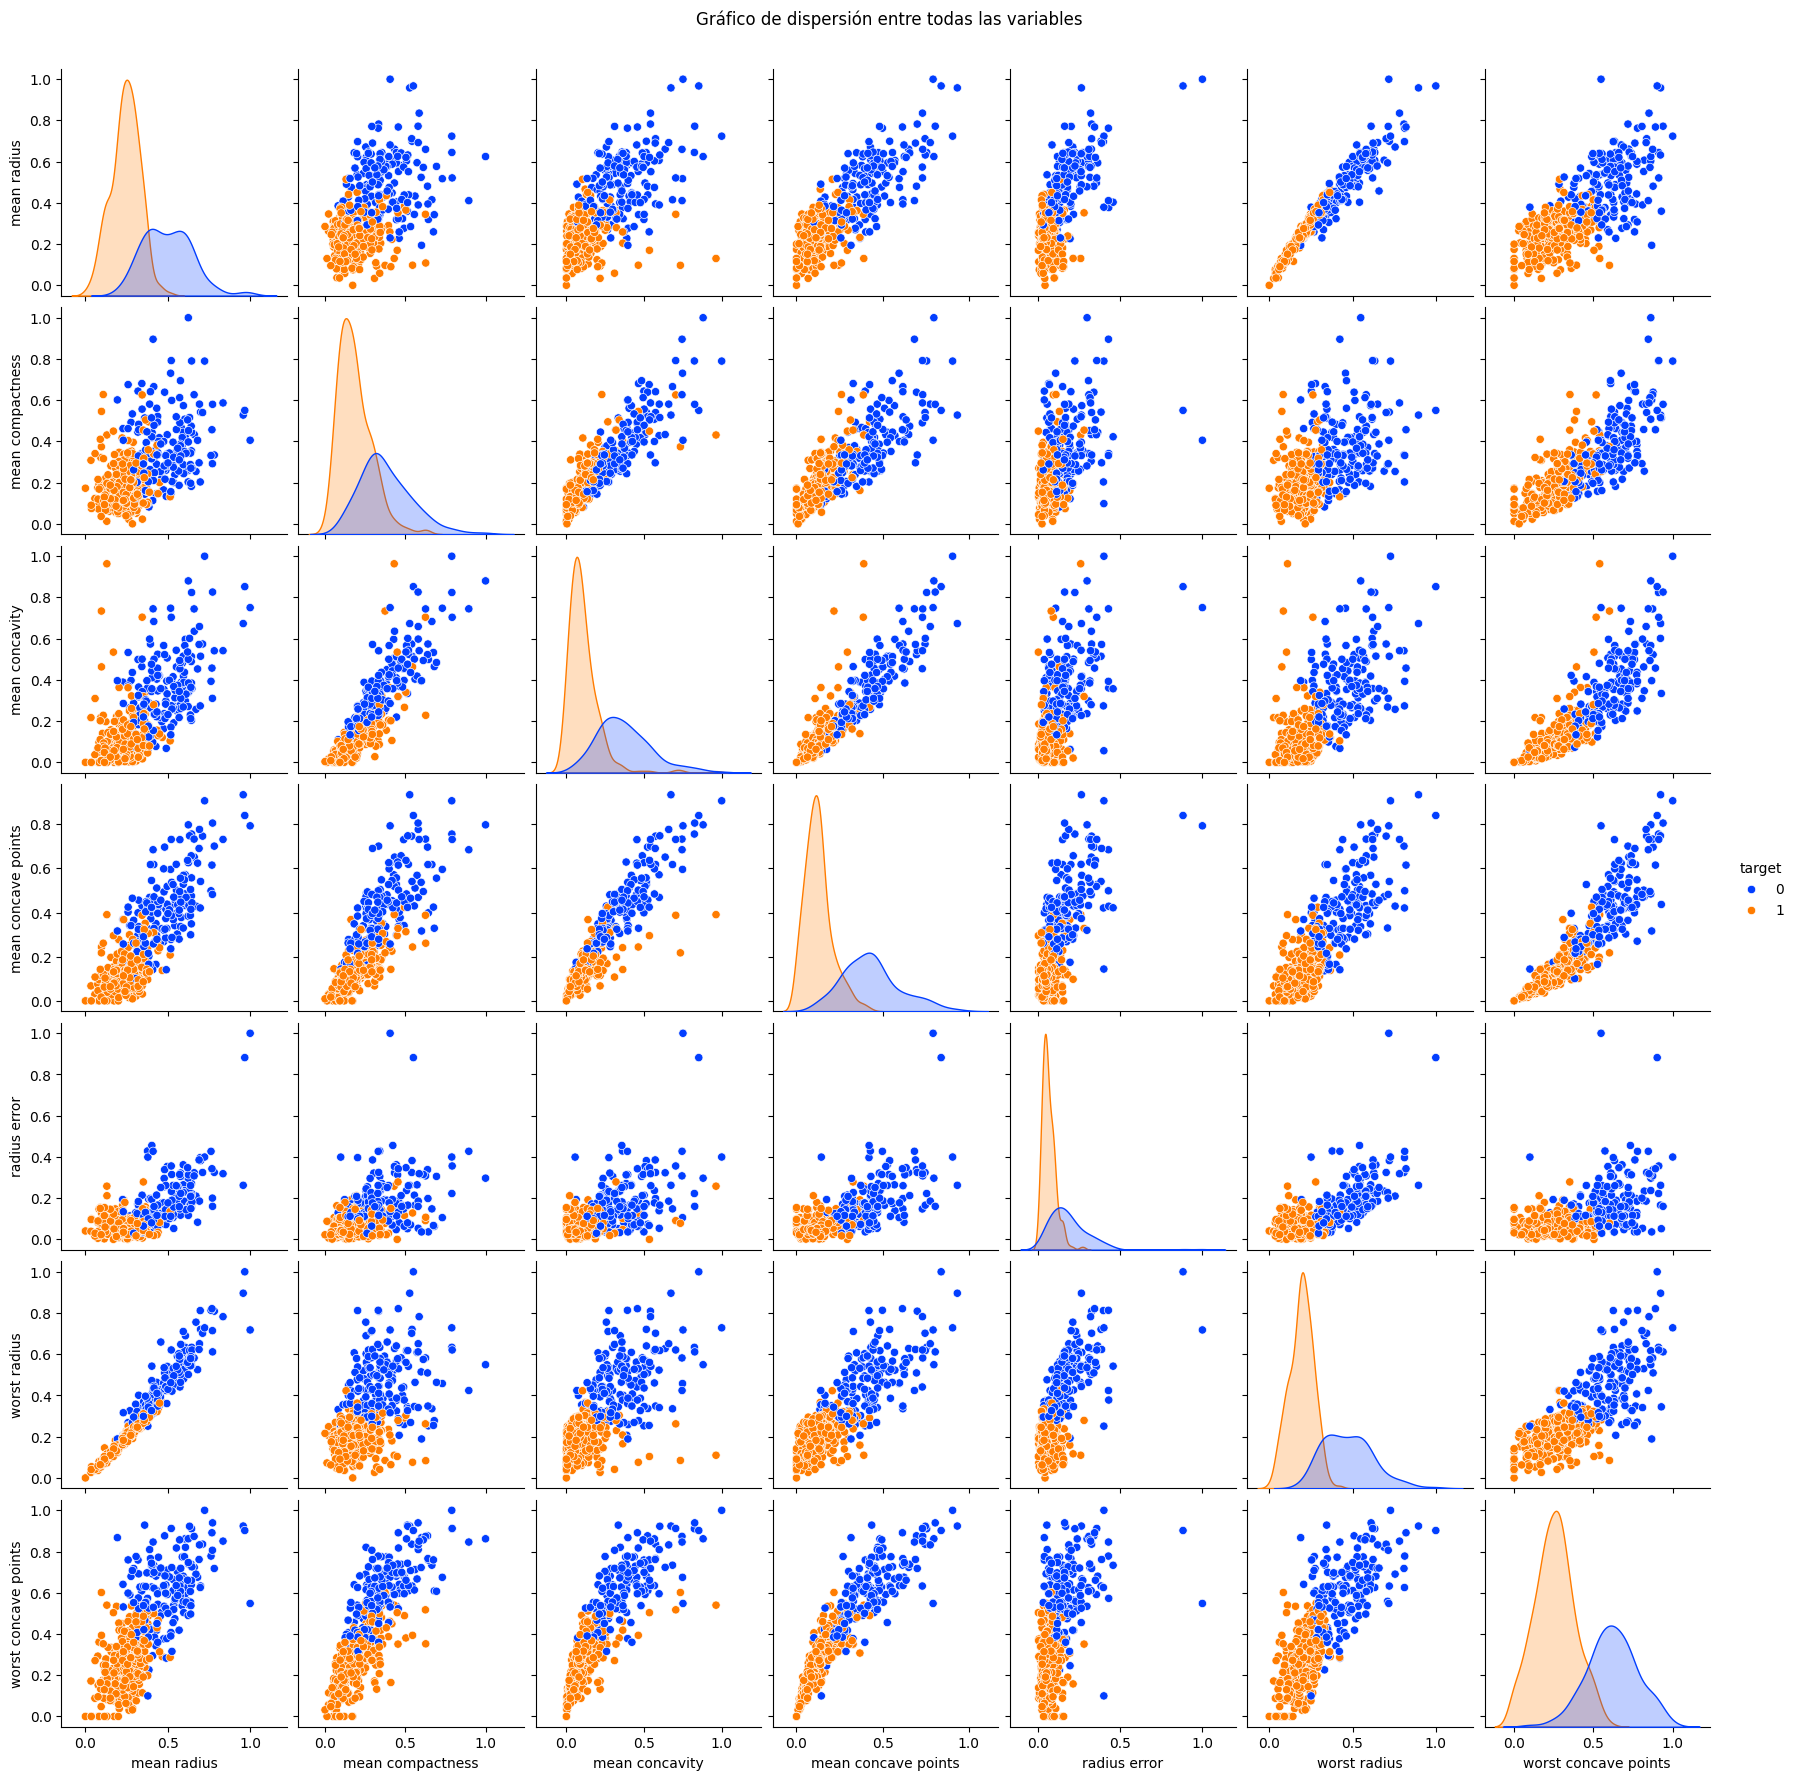

In [184]:
# Crear un gráfico de dispersión entre todas las variables, etiquetando los puntos en base a 'target'
sns.pairplot(XY_train, hue='target', diag_kind='kde', palette='bright')
plt.suptitle("Gráfico de dispersión entre todas las variables", y=1.02)
plt.show()

# Entrenamiento y Prueba de Modelos

In [185]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

nro_splits = 5

skf = StratifiedKFold(n_splits=nro_splits)

# Almacenar los mejores modelos y sus resultados
best_models = {}
results = {}

## Naïve Bayes

In [186]:
model = GaussianNB()

from sklearn.feature_selection import SequentialFeatureSelector

# Crear el selector de características secuencial
sfs = SequentialFeatureSelector(model, n_features_to_select="auto", direction='forward', scoring='f1', cv=skf, tol=1e-5)

# Ajustar el selector a los datos de entrenamiento
sfs.fit(X_train, y_train)

# Obtener las características seleccionadas
selected_features = X_train.columns[sfs.get_support()]
print(f"Selected features: {selected_features}")

Selected features: Index(['worst radius', 'worst concave points'], dtype='object')


In [187]:
# Filtrar las características en las particiones de los datasets
X_train_list = [X_train[selected_features] for X_train in X_train_list]
X_test_list = [X_test[selected_features] for X_test in X_test_list]

# Filtrar las características en los datasets de entrenamiento y prueba
X_train = X_train[selected_features]
X_test = X_test[selected_features]

# Mostrar las primeras filas del primer dataset de entrenamiento para verificar
X_train.head()

,worst radius,worst concave points
467,0.114550,0.085911
51,0.239772,0.295052
530,0.198150,0.347079
7,0.324795,0.534708
150,0.221629,0.216357


In [188]:
# Definir los hiperparámetros para Grid Search
params = {'var_smoothing': [1e-10, 1e-09, 1e-08, 1e-07]}

# Realizar Grid Search solo con X_train e y_train
grid_search = GridSearchCV(model, params, scoring='f1', cv=skf)
grid_search.fit(X_train, y_train)
best_models["Naive Bayes"] = grid_search.best_estimator_
results["Naive Bayes"] = grid_search.best_score_
print(f"Best Naive Bayes: {grid_search.best_params_} with F1 score: {grid_search.best_score_}")

Best Naive Bayes: {'var_smoothing': 1e-10} with F1 score: 0.9635668937771449


In [189]:
params = {'var_smoothing': [1e-12, 1e-11, 1e-10]}

# Realizar Grid Search solo con X_train e y_train
grid_search = GridSearchCV(model, params, scoring='f1', cv=skf)
grid_search.fit(X_train, y_train)
best_models["Naive Bayes"] = grid_search.best_estimator_
results["Naive Bayes"] = grid_search.best_score_
print(f"Best Naive Bayes: {grid_search.best_params_} with F1 score: {grid_search.best_score_}")


Best Naive Bayes: {'var_smoothing': 1e-12} with F1 score: 0.9635668937771449


In [190]:
# Entrenar el modelo de Naive Bayes con los sets generados en X_train_list e Y_train_list
nb_model = GaussianNB()

# Almacenar los resultados de cada fold
nb_results_train = []
nb_results_test = []
trained_models = []

for counter in range(nro_splits):
    X_train_fold = X_train_list[counter]
    y_train_fold = Y_train_list[counter]
    X_test_fold = X_test_list[counter]
    y_test_fold = Y_test_list[counter]
    
    # Entrenar el modelo
    nb_model.fit(X_train_fold, y_train_fold)
    trained_models.append(nb_model)
    
    # Evaluar el modelo en el conjunto de entrenamiento
    y_train_pred = nb_model.predict(X_train_fold)
    f1_score_train = m.f1_score(y_train_fold, y_train_pred)
    nb_results_train.append(f1_score_train)
    
    # Evaluar el modelo en el conjunto de prueba
    y_test_pred = nb_model.predict(X_test_fold)
    f1_score_test = m.f1_score(y_test_fold, y_test_pred)
    nb_results_test.append(f1_score_test)
    
    print(f"Fold {counter+1} - F1 Score Entrenamiento: {f1_score_train} - F1 Score Prueba: {f1_score_test}")

# Calcular el F1 score promedio
avg_f1_score_train = np.mean(nb_results_train)
avg_f1_score_test = np.mean(nb_results_test)
print(f"F1 Score Promedio Entrenamiento: {avg_f1_score_train}")
print(f"F1 Score Promedio Prueba: {avg_f1_score_test}")

# Mostrar el mejor modelo (Fold al final)
best_fold = np.argmax(nb_results_test) + 1
print(f"El mejor modelo es del Fold {best_fold} con F1 Score: {nb_results_test[best_fold-1]}")

nb_best_model = trained_models[best_fold-1]

Fold 1 - F1 Score Entrenamiento: 0.96875 - F1 Score Prueba: 0.920863309352518
Fold 2 - F1 Score Entrenamiento: 0.9583333333333334 - F1 Score Prueba: 0.9793103448275862
Fold 3 - F1 Score Entrenamiento: 0.9565217391304348 - F1 Score Prueba: 0.971830985915493
Fold 4 - F1 Score Entrenamiento: 0.9575971731448764 - F1 Score Prueba: 0.958904109589041
Fold 5 - F1 Score Entrenamiento: 0.9560632688927944 - F1 Score Prueba: 0.9571428571428572
F1 Score Promedio Entrenamiento: 0.9594531029002878
F1 Score Promedio Prueba: 0.9576103213654991
El mejor modelo es del Fold 2 con F1 Score: 0.9793103448275862


In [191]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

# Predecir en el conjunto de prueba
y_pred = nb_best_model.predict(X_test)

# Calcular las métricas de clasificación
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        42
           1       0.97      0.94      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



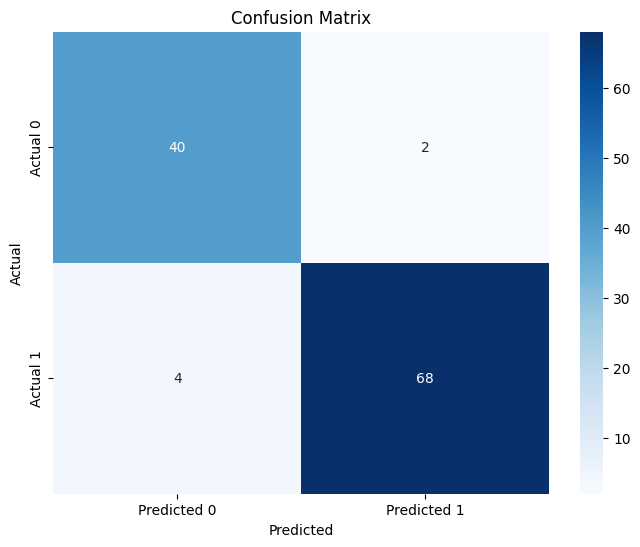

In [192]:
import seaborn as sns

import matplotlib.pyplot as plt

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

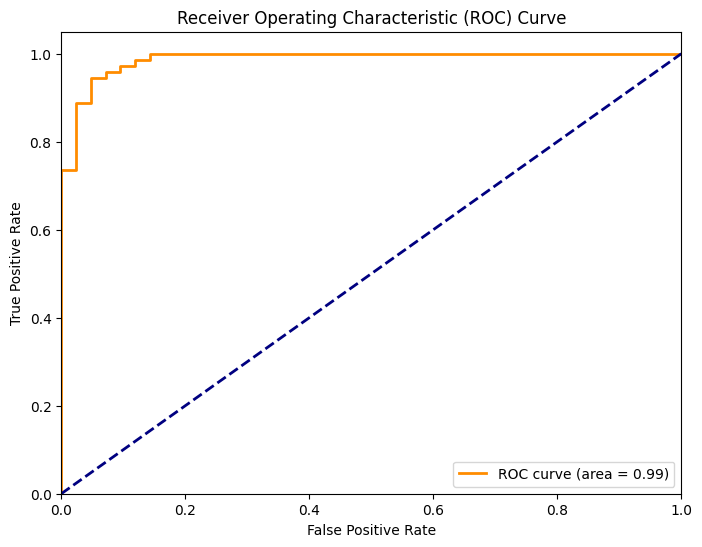

AUC: 0.9877645502645503


In [193]:
from sklearn.metrics import roc_curve, auc

# Calcular las probabilidades de predicción
y_prob = nb_best_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Calcular el AUC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Imprimir AUC
print("AUC:", roc_auc)

/home/ignaciochaves/code/python/inteligencia_artificial_2024/env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


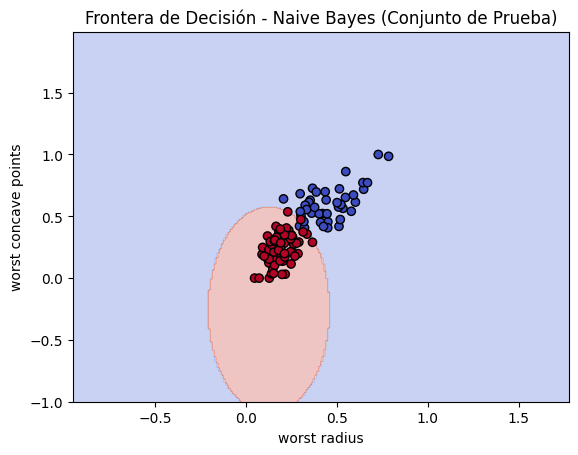

In [194]:
# Seleccionar el dataset 2 (índice 1) de X_test_list
X_test_selected = X_test_list[1]
y_test_selected = Y_test_list[1]

# Crear una malla de puntos para graficar la frontera de decisión
x_min, x_max = X_test_selected[selected_features[0]].min() - 1, X_test_selected[selected_features[0]].max() + 1
y_min, y_max = X_test_selected[selected_features[1]].min() - 1, X_test_selected[selected_features[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predecir las clases para cada punto en la malla
Z = nb_best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar la frontera de decisión
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')  # Cambiar el cmap a 'coolwarm'
plt.scatter(X_test_selected[selected_features[0]], X_test_selected[selected_features[1]], c=y_test_selected, edgecolors='k', cmap='coolwarm')  # Cambiar el cmap a 'coolwarm'
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.title('Frontera de Decisión - Naive Bayes (Conjunto de Prueba)')
plt.show()


# Definir los modelos y sus hiperparámetros para Grid Search
models = {
    'Naive Bayes': (GaussianNB(), {'var_smoothing': [1e-09, 1e-08, 1e-07]}),
    'LDA': (LinearDiscriminantAnalysis(), {'solver': ['svd', 'lsqr', 'eigen']}),
    'Logistic Regression': (LogisticRegression(max_iter=10000), {'C': [0.1, 1, 10], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}),
    'kNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_features': [None, 'sqrt', 'log2'], 'min_samples_split': [2, 5, 10]})
}